# Fast Fourier Transform

NumPy package has a [fft module](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html) which computes the discrete fourier transform. This is very useful in denoising the signal and identifying the underlying frequency components.   

In real life when we acquire/measure any data using electronic instruments, the real signal is often mixed with the noise generated due to the measuring intrument itself. It can be because of electronic thermal noise or due to amplification of signal. FFT is very useful to denoise your data.   

[**3blue1brown**](https://m.youtube.com/c/3blue1brown) is a YouTube channel which has [one amazing video to visualize fourier transform](https://www.youtube.com/watch?v=spUNpyF58BY&t=678s) among other very great videos.   

The code below is from [Steve Brunton's video](https://youtu.be/s2K1JfNR7Sc) where he uses FFT to denoise signals.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
plt.rcParams['figure.figsize']=(15,5)
plt.rcParams['figure.dpi']=300

In [ ]:
# Generate a Signal

# Time step
dt = 0.0001   

# Time array
t = np.arange(0,4,dt)
# You could try first with normal values of 2 and 3 Hz, skip creating audio of this for obvious reasons
# f_clean = np.sin(2*np.pi*2*t) + np.sin(2*np.pi*3*t)

# Next try this - f_clean =  Real signal at A4, D5 and C6 scale
f_clean = np.sin(2*np.pi*440*t) + np.sin(2*np.pi*587*t) + np.sin(2*np.pi*1046.50*t)  # high pitch beep
#f_clean = np.sin(2*np.pi*440*t) + np.sin(2*np.pi*512*t)
# f_clean = np.sin(2*np.pi*40*t) + np.sin(2*np.pi*60*t)  # Deep bass **Use headphones**
# Play around with different freq values 

'''
I have written 3 different lines of f_clean above,
Note that you need to uncomment one line at a time and observe
Further you can delete extra lines, just keep one line and play with different frequencies
'''

# f = f_clean Signal added with noise
# In real world scenario you would only have 'f'
f = f_clean + 2*np.random.randn(len(t))   # Add random values belonging to a normal distribution

# Plot both signals together

plt.plot(t,f,c='c',alpha=0.5,label="Data+Noise")
plt.plot(t,f_clean,lw=1,c='k',label="Clean Data")
# Uncomment the line below to see the oscillating waveform
# plt.xlim([0,0.1])
plt.legend()

In [3]:
# Audio of above signal - Real data + Noise added
ipd.Audio(f,rate = 10000, autoplay=True)

/Users/pratik/opt/miniconda3/envs/SETU/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


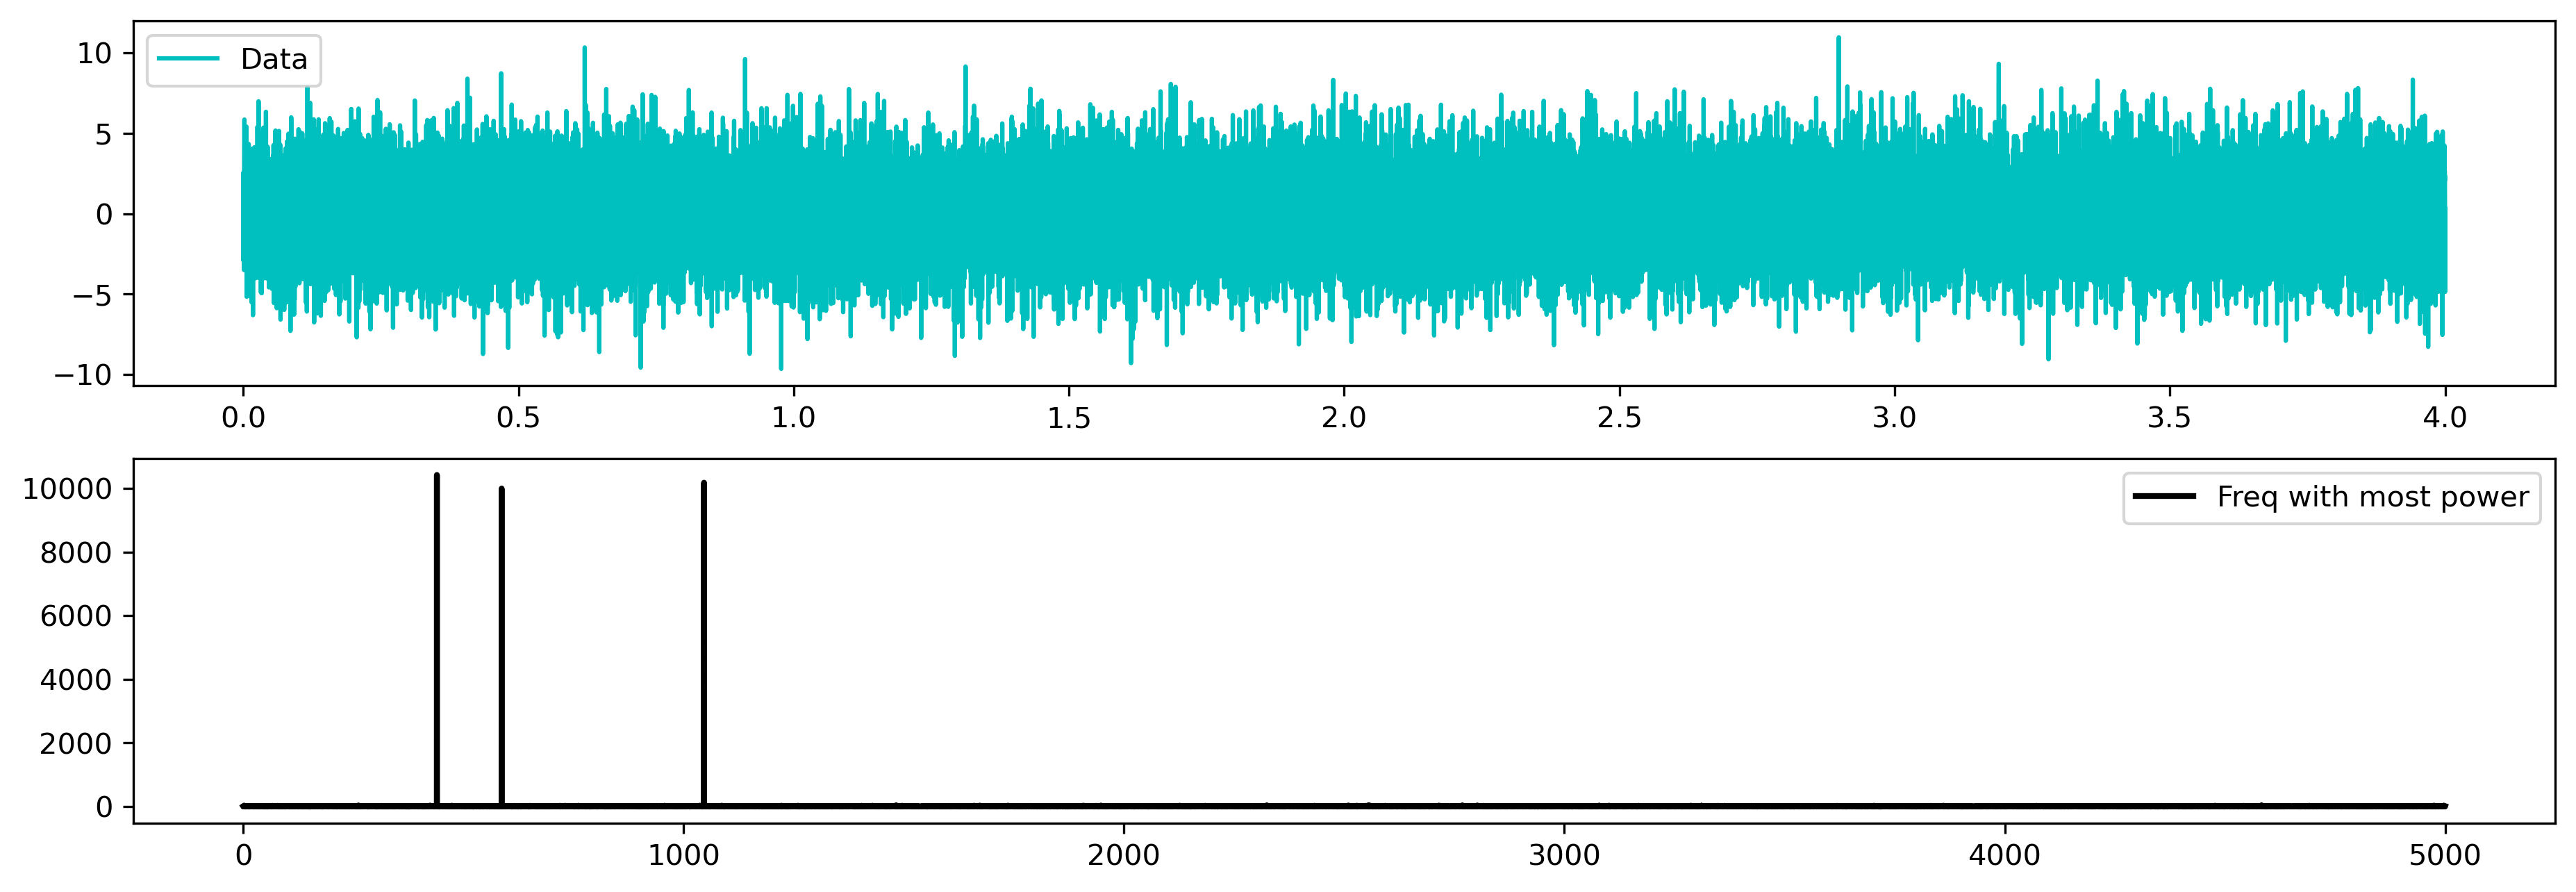

In [4]:
n = len(t) 

# Calculate Fourier Coefficients
# Fourier Coefficients are Complex values which consist of magnitudes and phases of frequencies

fprime = np.fft.fft(f,n)   # Compute FFT and get Fourier Coefficients
power_spectrum = fprime*np.conj(fprime)/n  # Power spectrum (gets freq which has high power or occurence)
freq = (1/(dt*n))*np.arange(n)  # X axis of frequencies
L = np.arange(1,np.floor(n/2),dtype='int') # Index elements

fig,ax = plt.subplots(2,1)

ax[0].plot(t,f,c='c',label="Data")
#ax[0].plot(t,f_clean,c='c')
ax[0].legend()

ax[1].plot(freq[L],power_spectrum[L],c='k',lw=2,label="Freq with most power")  # Frequency domain plot
ax[1].legend()


In [5]:
index = power_spectrum > 2000   # Index for values above threshold
power_clean = power_spectrum * index   # Power freq terms corresponding to the index choosen
fprime = index * fprime   # fft terms corresponding to index
inv_fft = np.fft.ifft(fprime)   # Take inverse fft of only those terms and filter out noise

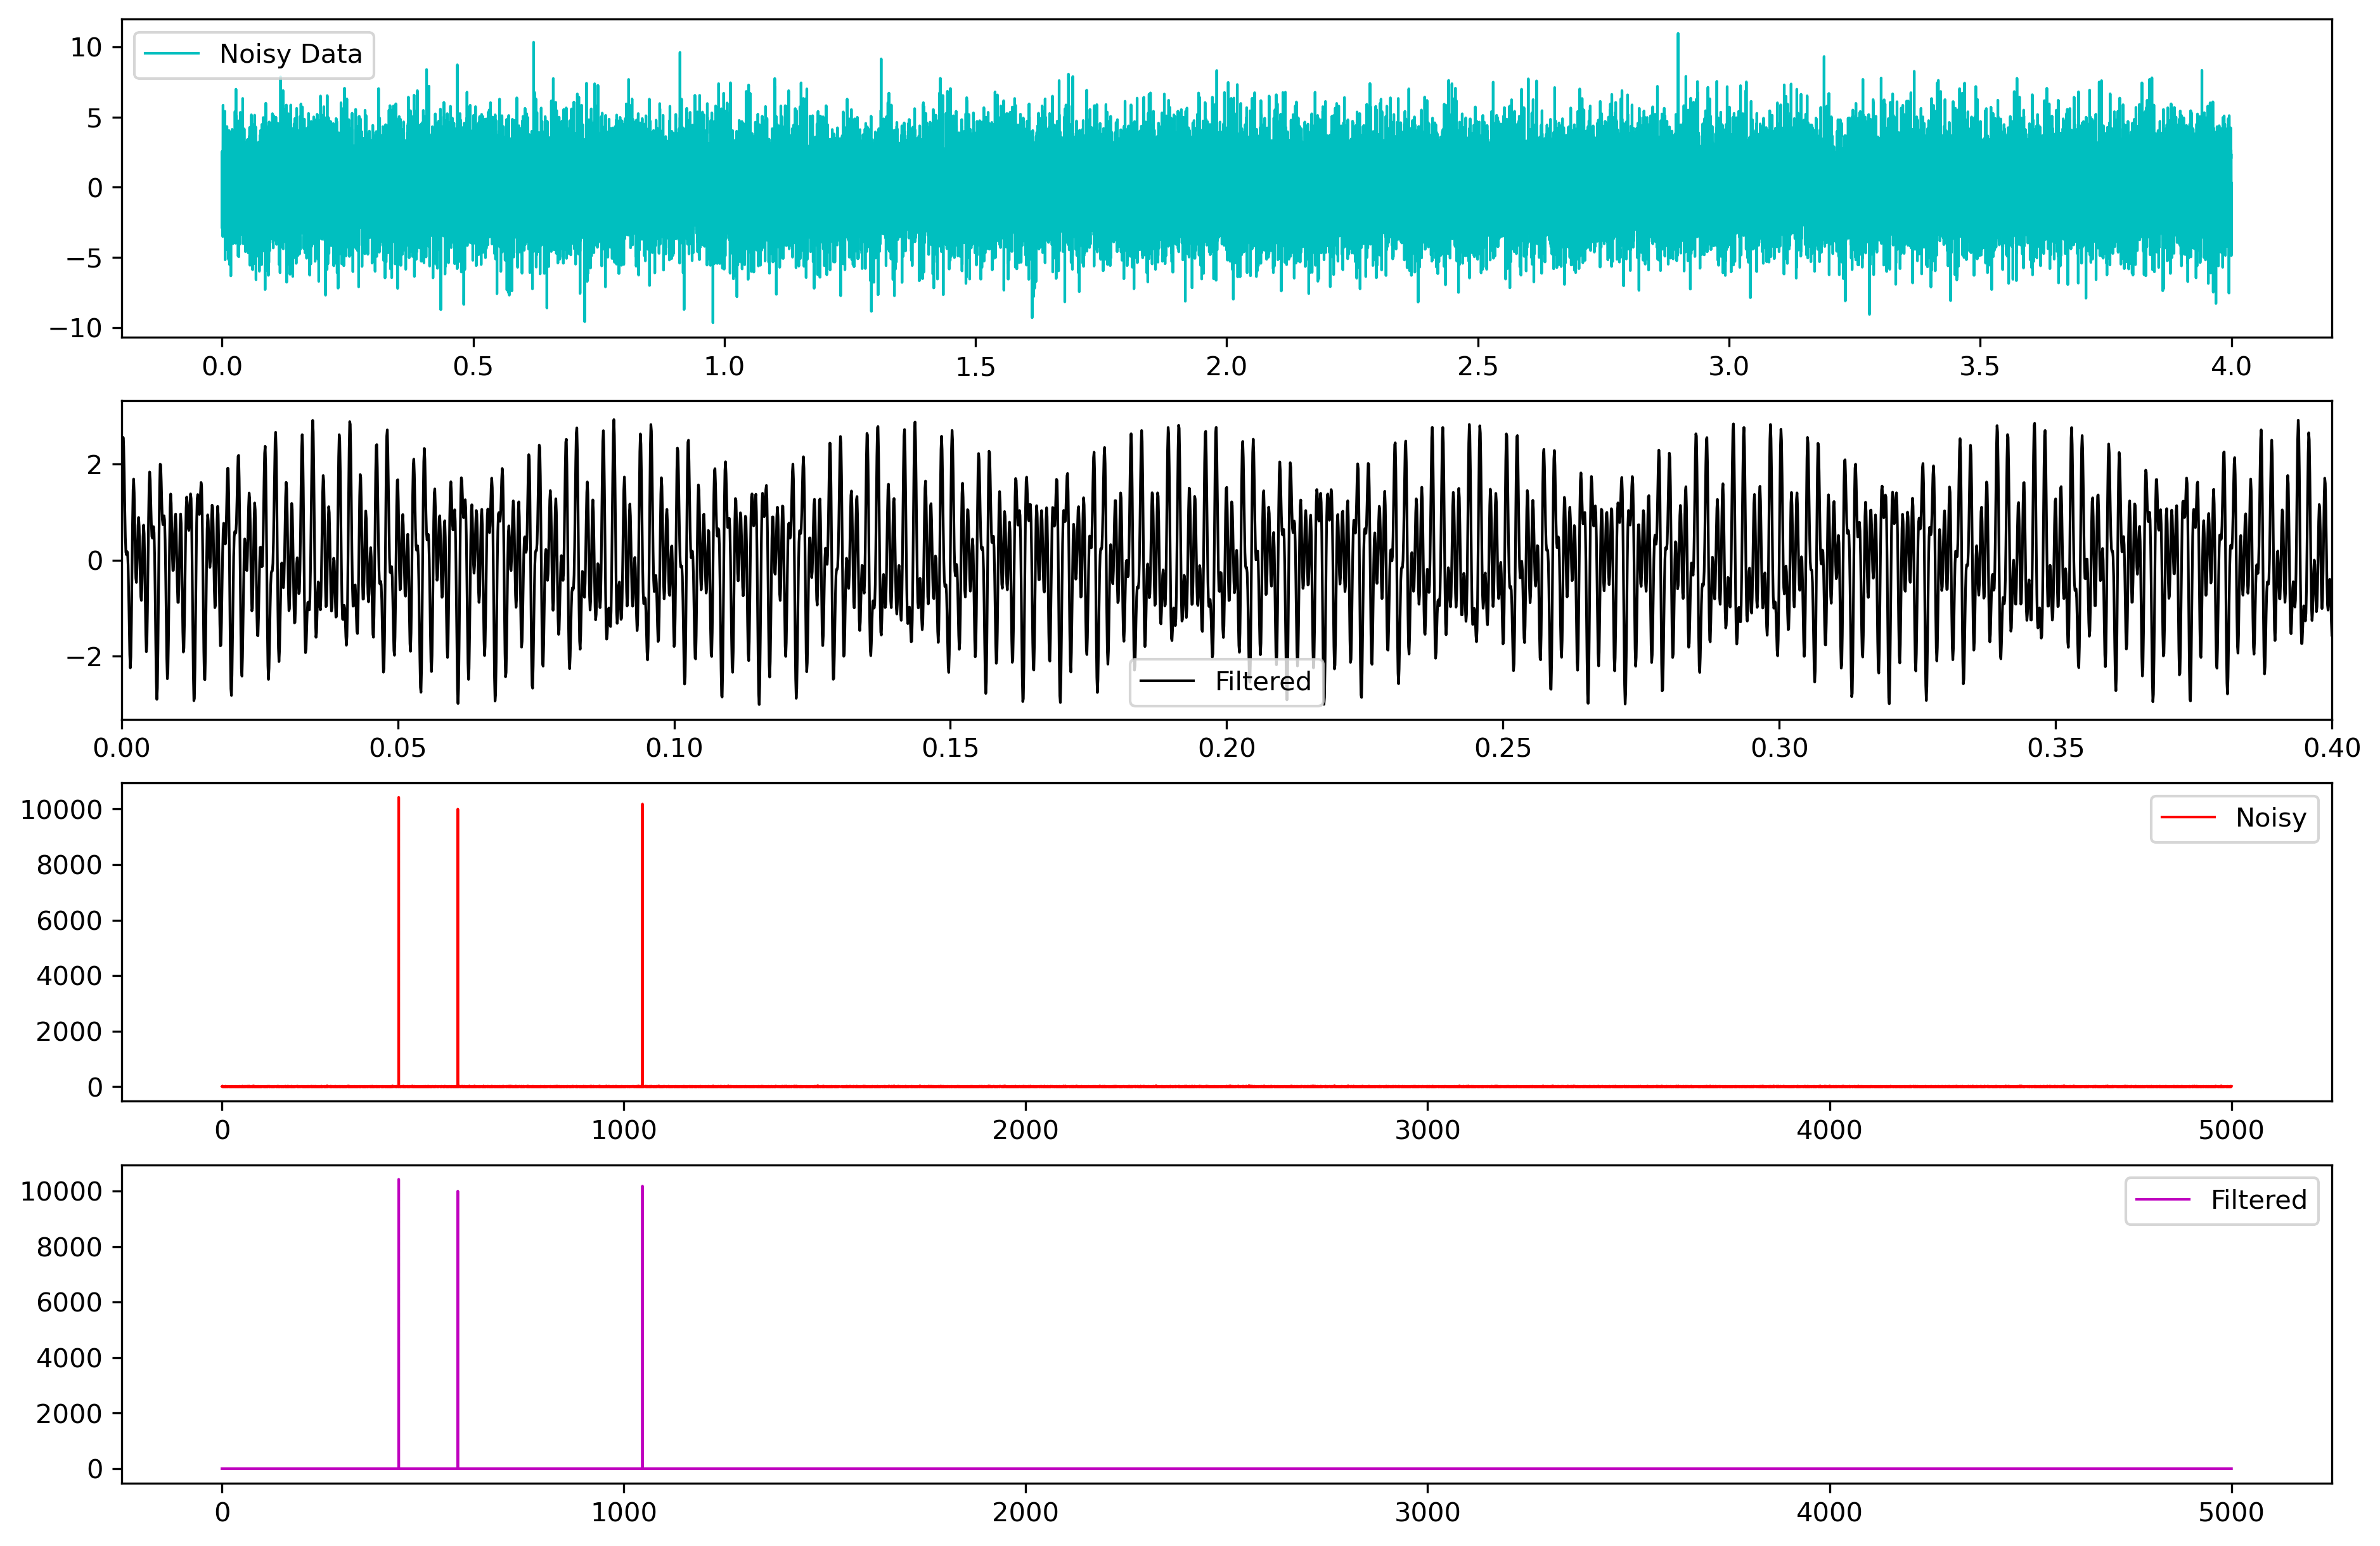

In [6]:
# Plot everything together

fig,ax = plt.subplots(4,1,figsize=(15,10),dpi=300)

ax[0].plot(t,f,c='c',lw=1,label="Noisy Data")
ax[0].legend()

ax[1].plot(t,inv_fft,c='k',lw=1,label="Filtered")
ax[1].set_xlim([0,0.4])
ax[1].legend()

ax[2].plot(freq[L],power_spectrum[L],c='r',lw=1,label="Noisy")
ax[2].legend()

ax[3].plot(freq[L],power_clean[L],c='m',lw=1,label="Filtered")
ax[3].legend()

In [7]:
ipd.Audio(inv_fft,rate = 10000, autoplay=True)

/Users/pratik/opt/miniconda3/envs/SETU/lib/python3.11/site-packages/IPython/lib/display.py:172: ComplexWarning: Casting complex values to real discards the imaginary part
  data = np.array(data, dtype=float)
